In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'../dataset/heart.csv')  

In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### here the data is in categorical form so we convert it to numerical form using label encoding and ordinal encoding

In [8]:
df.select_dtypes('object').head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [9]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [11]:
df['Sex'] = lb.fit_transform(df['Sex'])

In [12]:
df['Sex'][:2]

0    1
1    0
Name: Sex, dtype: int64

In [13]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [14]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [15]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [16]:
df['ChestPainType'] = lb.fit_transform(df['ChestPainType'])
df['ExerciseAngina'] = lb.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = lb.fit_transform(df['ST_Slope'])


In [17]:
from sklearn.preprocessing import OrdinalEncoder
order = OrdinalEncoder()

In [18]:
df['RestingECG'] = order.fit_transform(df[['RestingECG']])

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1.0,172,0,0.0,2,0
1,49,0,2,160,180,0,1.0,156,0,1.0,1,1
2,37,1,1,130,283,0,2.0,98,0,0.0,2,0
3,48,0,0,138,214,0,1.0,108,1,1.5,1,1
4,54,1,2,150,195,0,1.0,122,0,0.0,2,0


<Axes: xlabel='HeartDisease', ylabel='count'>

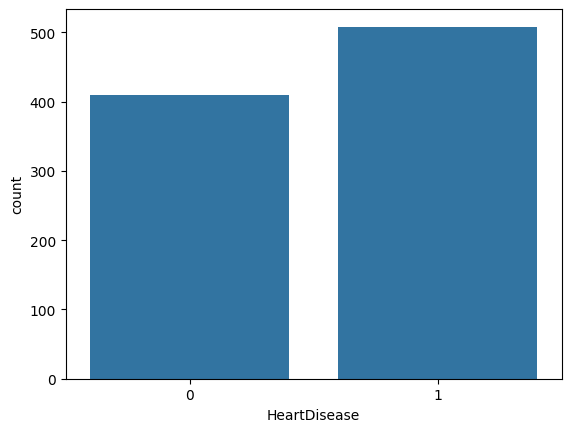

In [20]:
sns.countplot(x=df['HeartDisease'])

## Model Building for Random Forest

In [21]:
x = df.drop('HeartDisease', axis=1)
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1.0,172,0,0.0,2
1,49,0,2,160,180,0,1.0,156,0,1.0,1
2,37,1,1,130,283,0,2.0,98,0,0.0,2
3,48,0,0,138,214,0,1.0,108,1,1.5,1
4,54,1,2,150,195,0,1.0,122,0,0.0,2


In [22]:
y = df['HeartDisease']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=65)

In [24]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)

(918, 12)
(596, 11)
(322, 11)


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [26]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_pred = rf.predict(x_test)


In [28]:
y_pred.shape

(322,)

In [29]:
y_test.shape

(322,)

In [30]:
clf = classification_report(y_test, y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       145
           1       0.84      0.95      0.89       177

    accuracy                           0.87       322
   macro avg       0.88      0.86      0.87       322
weighted avg       0.88      0.87      0.87       322



In [31]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[113  32]
 [  9 168]]


<Axes: >

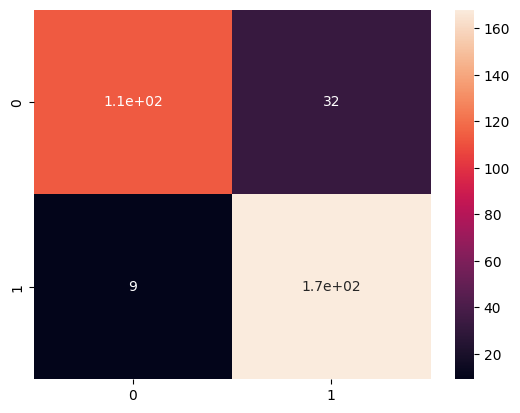

In [32]:
sns.heatmap(conf, annot=True)

In [33]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=100, num=10)]

#Number of features to consider at every split
max_features = ['sqrt','log2',None,0.5,0.7,5]

#Maximum number of levels in tree
max_depth = [2,4,6,8,10,11,13]

#Minimum number of samples required to split a node
min_samples_split = [2,5]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

#Method of selection samples for training each tree
bootstrap = [True, False]

In [34]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap,
}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['sqrt', 'log2', None, 0.5, 0.7, 5], 'max_depth': [2, 4, 6, 8, 10, 11, 13], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [35]:
rf_model = RandomForestClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

In [37]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits
[CV 3/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.874 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.849 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.765 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.849 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.833 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.756 total time=   0.1s
[CV 3/5] END bootstrap=True,

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [2, 4, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,40


In [40]:
print(rf_grid.score(x_train,y_train))
print(rf_grid.score(x_test,y_test))

0.9949664429530202
0.8726708074534162


In [41]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [37]:
rf_model = RandomForestClassifier(bootstrap=True, max_depth=11, max_features='sqrt',min_samples_leaf=1,min_samples_split=2, n_estimators=40)

In [38]:
rf_model.fit(x_train,y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred = rf_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [41]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[116  29]
 [ 11 166]]


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       145
           1       0.85      0.94      0.89       177

    accuracy                           0.88       322
   macro avg       0.88      0.87      0.87       322
weighted avg       0.88      0.88      0.87       322

